**MJL_PUCS661_NF**

In [ ]:
#IMPORT STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = "{:10,.2f}".format

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import r2_score 

from sklearn.model_selection import train_test_split


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [ ]:
#Custom modlue import (NOTE: The Provider.py must be uploaded)
import Provider as dataP

In [ ]:
#Global Variables
honeyData = dataP.DataProvider()
combinedDf = honeyData.getUnifiedDataset()


/content/Provider.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Number of Colonies'] = temp1['Number of Colonies'].multiply(1000)
/content/Provider.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Total Production'] = temp1['Total Production'].multiply(1000)
/content/Provider.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
#check the loaded data
print("Raw Summary\n \n ", combinedDf.isnull().sum())          

#combinedDf.head(50)

Raw Summary
 
  State                       0
State Name                  0
Region                      0
Year                        0
Number of Colonies          0
Yield per Colony            0
Total Production            0
Stocks                      0
Avrg Price per LB           0
Value of Production         0
Varroa mites             1151
Other pests-parasites    1151
Diseases                 1151
Pesticides               1151
Stressor-Other           1151
Stressor Unknown         1151
FIPS                      180
nCLOTHIANIDIN             417
nIMIDACLOPRID             417
nTHIAMETHOXAM             417
nACETAMIPRID              417
nTHIACLOPRID              417
nAllNeonic                417
dtype: int64


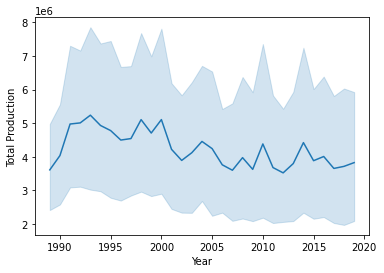

In [ ]:
#GENERAL TREND: Total Production 
#QUESTION: what are the general production trend for each states?

prodDf = combinedDf[['Year', 'State', 'Total Production']]
prodDf.reset_index(inplace=True)

sns.lineplot(data=prodDf, x='Year', y='Total Production')

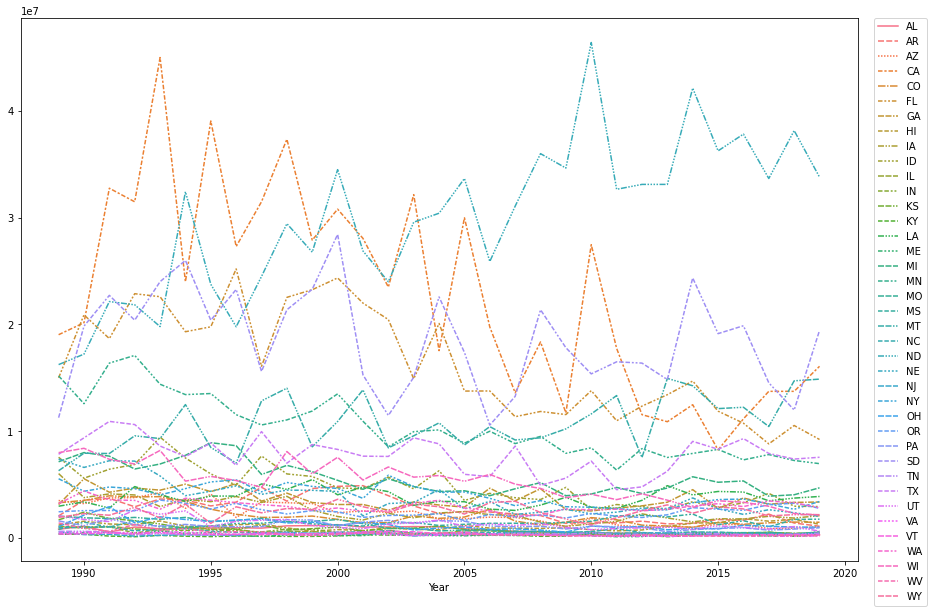

In [ ]:
#TRENDS DETAIL: Total Production

prod_pivot = prodDf.pivot('Year', 'State', 'Total Production')
prod_pivot = prod_pivot.dropna(axis=1, how='any')

fig = plt.gcf()
fig.set_size_inches(15, 10)

sns.lineplot(data=prod_pivot)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


Text(0, 0.5, 'Value of Production (in 1,000,000)')

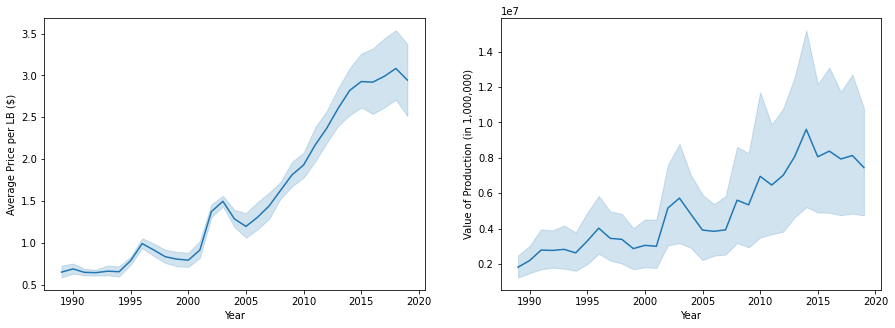

In [ ]:
#GENERAL TREND: Avrg Price per LB
#QUESTION: what are the general price trend for each states?

fig, axes = plt.subplots(1,2 , figsize=(15,5), sharey=False)


priceDf = combinedDf[['Year', 'State', 'Avrg Price per LB']]
priceDf.reset_index(inplace=True)
sns.lineplot(data=priceDf, x='Year', y='Avrg Price per LB', ax=axes[0])
axes[0].set_ylabel('Average Price per LB ($)')

valueDf = combinedDf[['Year', 'State', 'Value of Production']]
valueDf.reset_index(inplace=True)
sns.lineplot(data=valueDf, x='Year', y='Value of Production', ax=axes[1])
axes[1].set_ylabel('Value of Production (in 1,000,000)')

In [ ]:
#LINEAR REGRESSION #1: Total production

y = combinedDf['Total Production']

X = combinedDf[['Year', 'Number of Colonies', 'Yield per Colony']]
X['State'] = combinedDf['State'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

linearModel_1 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linearModel_1.fit(X_train, y_train)

y_predicted = linearModel_1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#LINEAR REGRESSION #1 RESULT:
print(f"R2 SCORE: {r2_score(y_test, y_predicted)}")

R2 SCORE: 0.941554225430375


In [ ]:
#LINEAR REGRESSION #1 RESULT:
result = pd.DataFrame({'Actual': y_test, 'Predicted':y_predicted})
result.head(10)

,Actual,Predicted
1348,"19,440,000.00","18,848,729.53"
953,"984,000.00","891,770.15"
303,"1,050,000.00","686,693.33"
1125,"3,627,000.00","5,162,753.44"
481,"8,880,000.00","8,728,914.72"
179,"2,665,000.00","2,727,468.76"
48,"3,000,000.00","3,035,342.77"
137,"18,675,000.00","16,149,220.09"
24,"450,000.00","-642,396.39"
182,"4,615,000.00","4,550,615.46"


In [ ]:
#LINEAR REGRESSION #1 RESULT:
print(f"ABSOLUTE ERROR: {metrics.mean_absolute_error(y_test, y_predicted)}")
print(f"SQUARED ERROR: {metrics.mean_squared_error(y_test, y_predicted)}")

ABSOLUTE ERROR: 1121278.9928827642
SQUARED ERROR: 3465600391235.4097


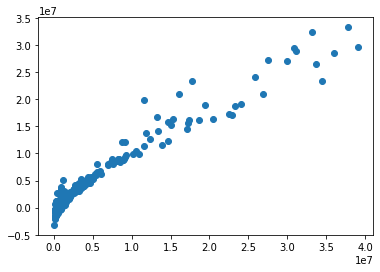

In [ ]:
#LINEAR REGRESSION #1 RESULT:

#plotting
plt.scatter(x=y_test, y=y_predicted)

In [ ]:
#LINEAR REGRESSION #2: Value of Production

y = combinedDf['Value of Production']

X = combinedDf[['Year', 'Total Production', 'Stocks','Avrg Price per LB']]
X['State'] = combinedDf['State'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

linearModel_2 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linearModel_2.fit(X_train, y_train)

y_predicted = linearModel_2.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#LINEAR REGRESSION #2: RESULT
print(f"R2 SCORE: {r2_score(y_test, y_predicted)}")

R2 SCORE: 0.8068410093074547


In [ ]:
#LINEAR REGRESSION #2: RESULT
result = pd.DataFrame({'Actual': y_test, 'Predicted':y_predicted})
result.head(10)

,Actual,Predicted
1348,"29,743,000.00","26,013,367.79"
953,"590,000.00","1,091,672.41"
303,"714,000.00","-2,165,765.31"
1125,"2,140,000.00","4,097,597.46"
481,"7,992,000.00","10,448,677.21"
179,"3,918,000.00","4,386,759.72"
48,"3,780,000.00","2,913,918.92"
137,"9,898,000.00","16,852,554.62"
24,"837,000.00","1,667,593.42"
182,"7,015,000.00","6,198,367.92"


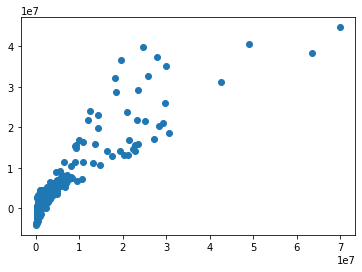

In [ ]:
#LINEAR REGRESSION #2: RESULT
plt.scatter(x=y_test, y=y_predicted)

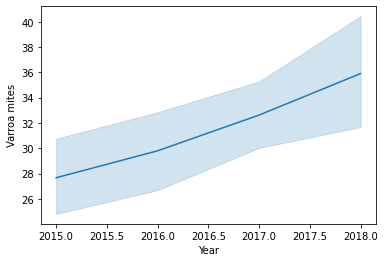

In [ ]:
#EXTRA: Stressors
stressDf = combinedDf[combinedDf['Varroa mites'].notnull()][['State', 'Year', 'Varroa mites']]

sns.lineplot(data=stressDf, x='Year', y='Varroa mites')

R2 SCORE: -0.10282650630627854


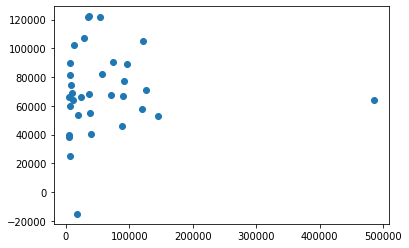

In [ ]:
#LINEAR REGRESSION #3: Stressor vs Number of Colonies

y = combinedDf[combinedDf['Varroa mites'].notnull()]['Number of Colonies']

X = combinedDf[combinedDf['Varroa mites'].notnull()][['State', 'Year','Varroa mites', 'Diseases', 'Pesticides']]
X['State'] = X['State'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


linearModel_3 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linearModel_3.fit(X_train, y_train)

y_predicted = linearModel_3.predict(X_test)


print(f"R2 SCORE: {r2_score(y_test, y_predicted)}")

plt.scatter(x=y_test, y=y_predicted)

R2 SCORE: 0.07658687707398315


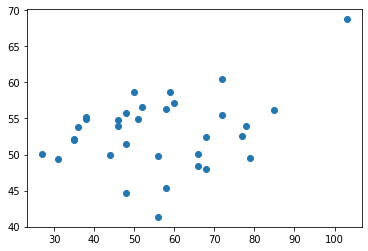

In [ ]:
#LINEAR REGRESSION #4: Stressor vs Yield per Colony

y = combinedDf[combinedDf['Varroa mites'].notnull()]['Yield per Colony']

X = combinedDf[combinedDf['Varroa mites'].notnull()][['State', 'Year','Varroa mites', 'Diseases', 'Pesticides']]
X['State'] = X['State'].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


linearModel_4 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linearModel_4.fit(X_train, y_train)

y_predicted = linearModel_4.predict(X_test)

print(f"R2 SCORE: {r2_score(y_test, y_predicted)}")

plt.scatter(x=y_test, y=y_predicted)